## Titanic Survival Analysis: Exploratory Data Analysis (EDA)

In [27]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


In [28]:

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [29]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


# Data Cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Dataset Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing Values Before Cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [30]:
# Fill missing age with median age grouped by Pclass and Sex
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Feature Engineering

In [31]:

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create fare per person feature
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

print("\nAfter Feature Engineering:")
display(df.head())


After Feature Engineering:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,1,8.05000


In [32]:

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

print("\nFrequency Distribution for Categorical Features:")
display(df.describe(include=['O']))



Descriptive Statistics for Numerical Features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200



Frequency Distribution for Categorical Features:


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


# Data Visualization

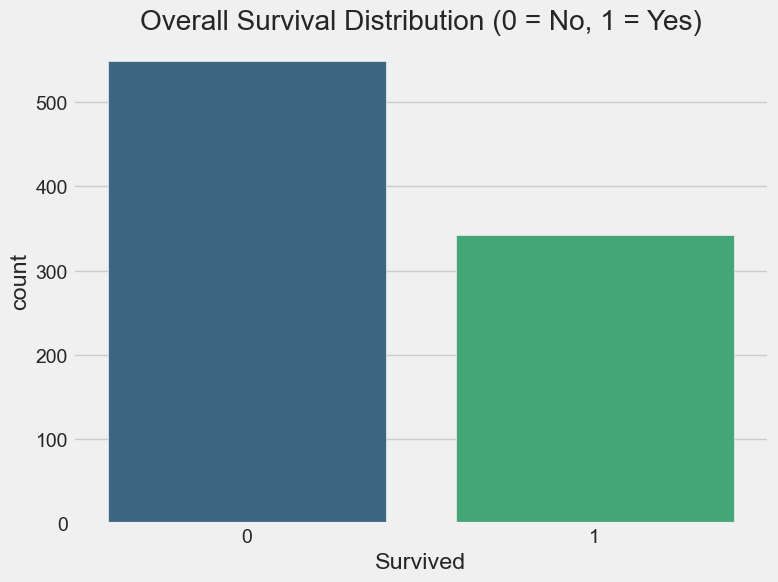

Overall Survival Rate: 38.38%


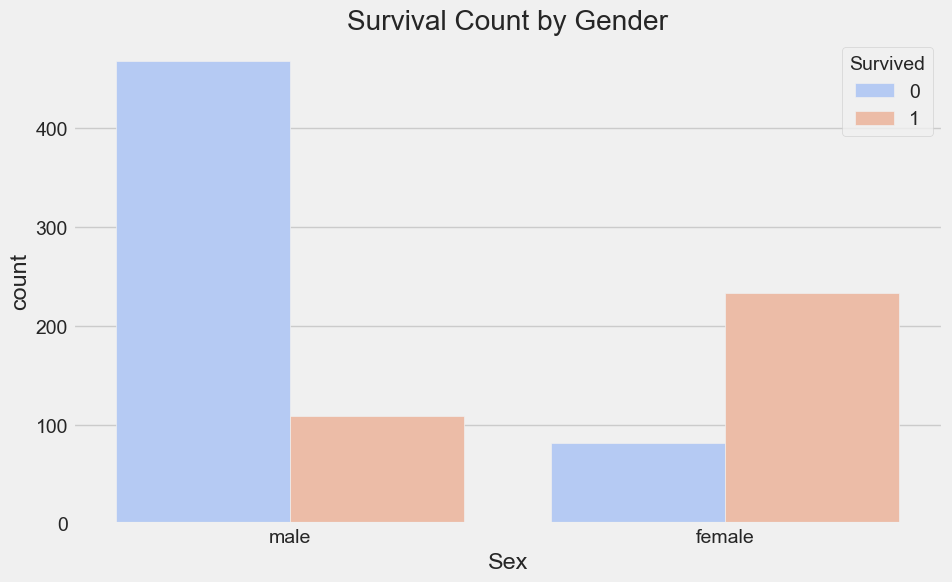


Survival Rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


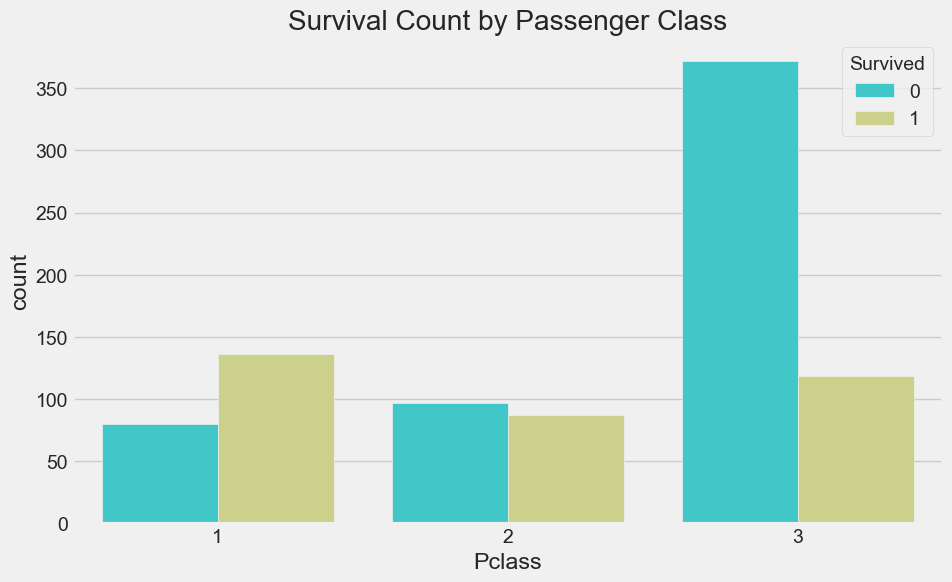


Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


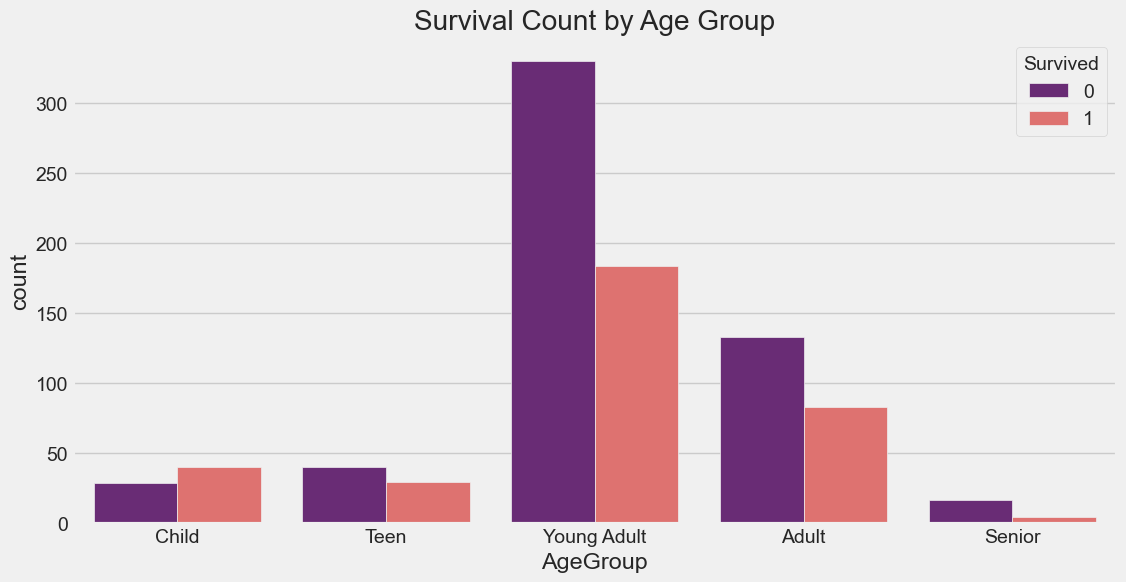


Survival Rate by Age Group:
AgeGroup
Child          57.971014
Teen           42.857143
Young Adult    35.797665
Adult          38.425926
Senior         22.727273
Name: Survived, dtype: float64


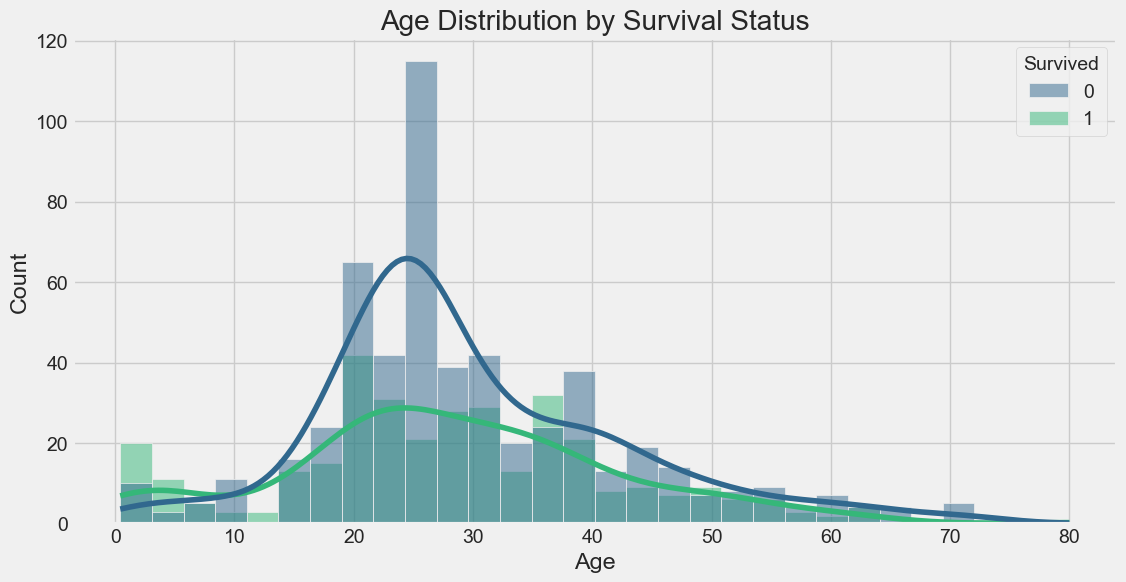

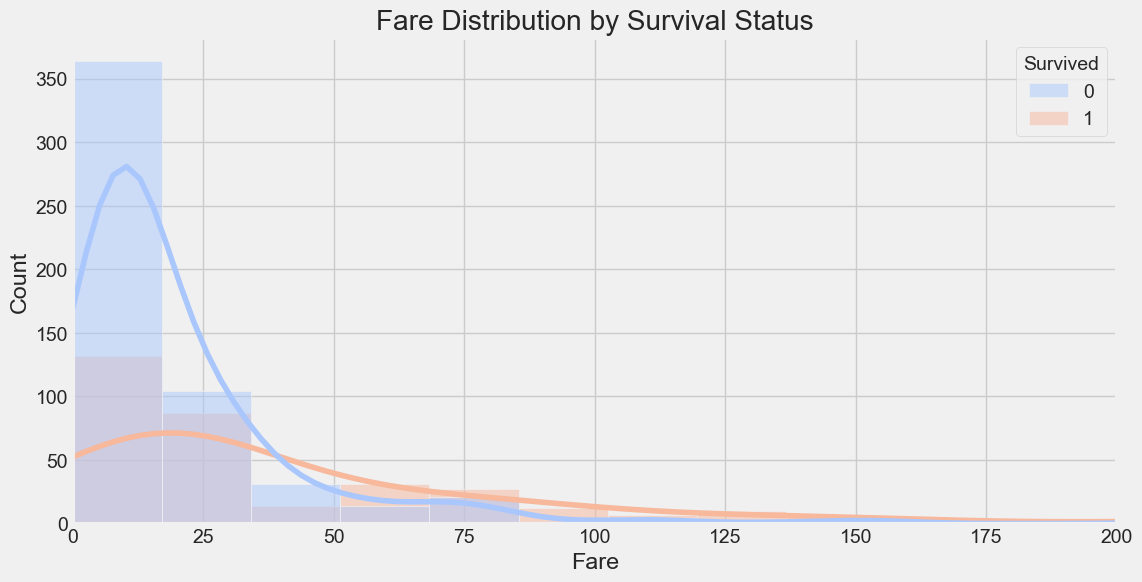

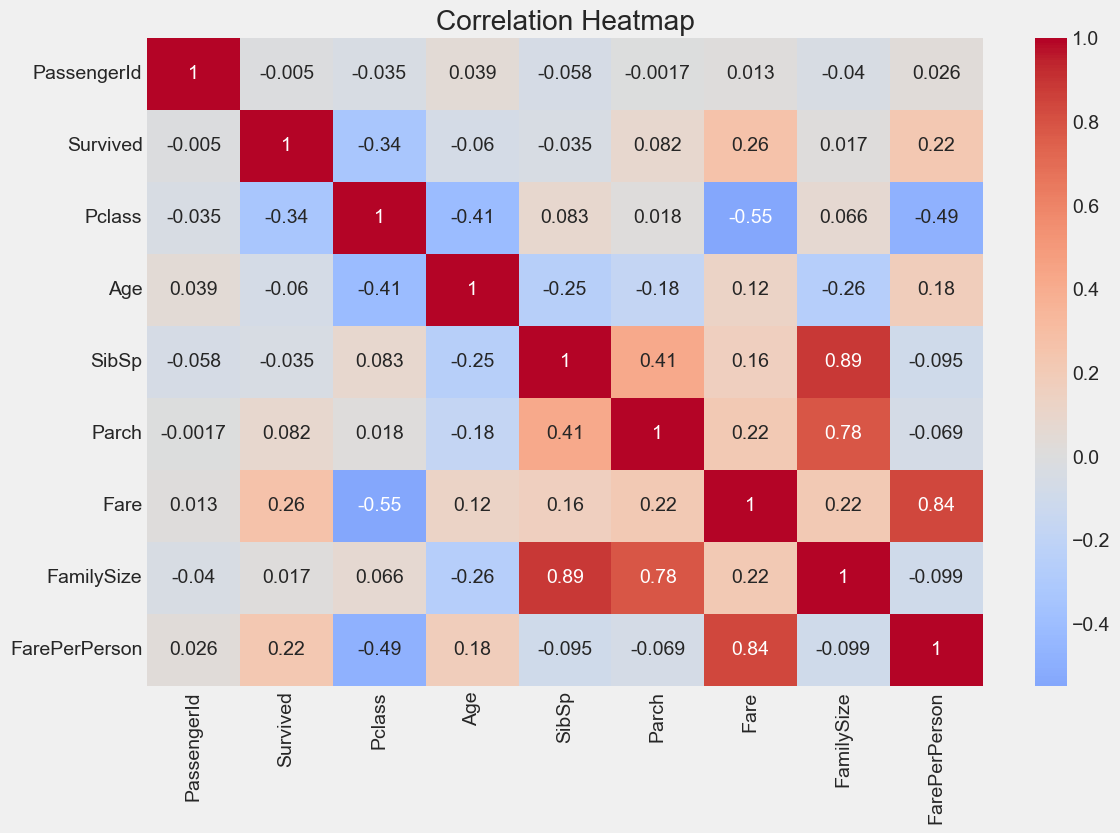

In [34]:

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (12, 6)

# ## 1. Survival Distribution

# Overall survival rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Overall Survival Distribution (0 = No, 1 = Yes)')
plt.show()

survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Count by Gender')
plt.show()

gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Gender:")
print(gender_survival)


# Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='rainbow')
plt.title('Survival Count by Passenger Class')
plt.show()

class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class:")
print(class_survival)


# Survival by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='magma')
plt.title('Survival Count by Age Group')
plt.show()

age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival Rate by Age Group:")
print(age_survival)


# Age Distribution by Survival
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='viridis')
plt.title('Age Distribution by Survival Status')
plt.show()


# Fare Distribution by Survival
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True, palette='coolwarm')
plt.title('Fare Distribution by Survival Status')
plt.xlim(0, 200)  
plt.show()


# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



<Figure size 1200x600 with 0 Axes>

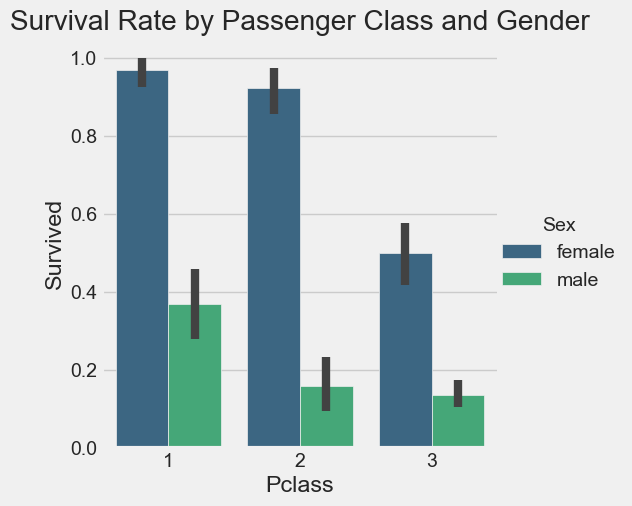

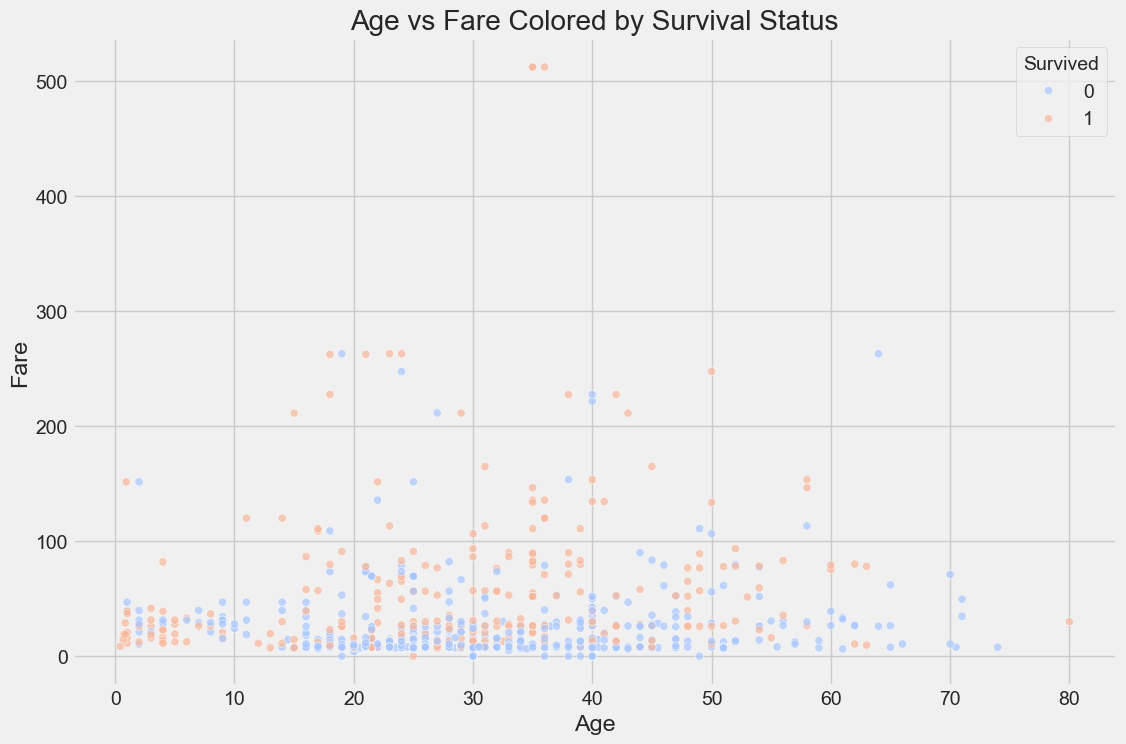

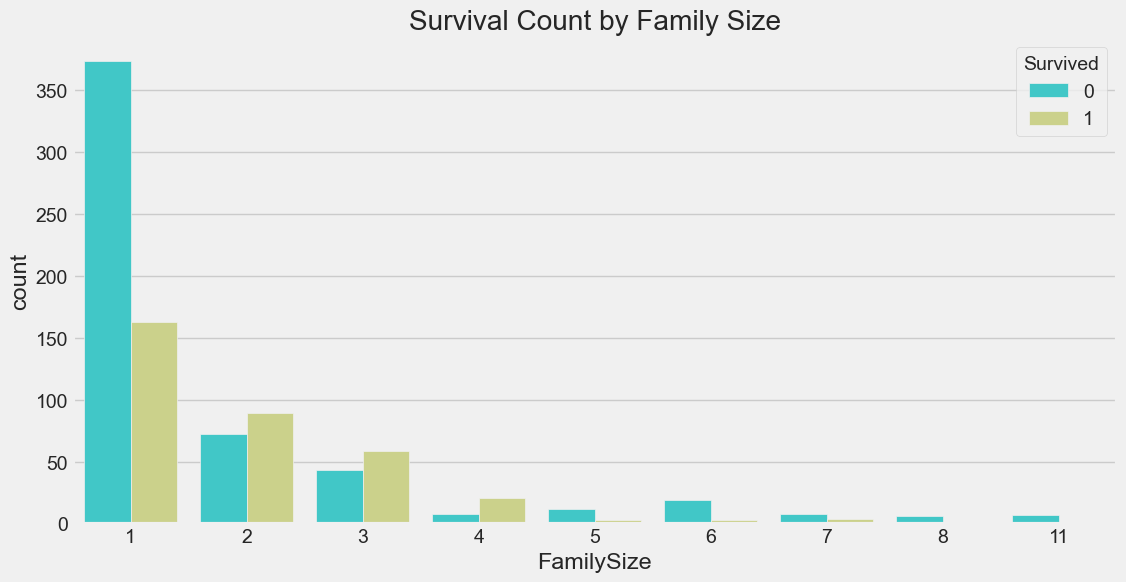

In [ ]:

# ## 2. Multivariate Analysis


# Survival by Class and Gender
plt.figure(figsize=(12, 6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', palette='viridis')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()


# Age vs Fare colored by Survival
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare Colored by Survival Status')
plt.show()


# Family Size vs Survival
plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='rainbow')
plt.title('Survival Count by Family Size')
plt.show()


In [35]:


# ## Key Findings and Insights

# Summary of key findings
print("Key Findings:")
print("1. Overall Survival Rate: {:.2f}%".format(survival_rate))
print("\n2. Survival by Gender:")
print("   - Female: {:.2f}%".format(gender_survival['female']))
print("   - Male: {:.2f}%".format(gender_survival['male']))
print("\n3. Survival by Passenger Class:")
for cls, rate in class_survival.items():
    print("   - Class {}: {:.2f}%".format(cls, rate))
print("\n4. Survival by Age Group:")
for age, rate in age_survival.items():
    print("   - {}: {:.2f}%".format(age, rate))

Key Findings:
1. Overall Survival Rate: 38.38%

2. Survival by Gender:
   - Female: 74.20%
   - Male: 18.89%

3. Survival by Passenger Class:
   - Class 1: 62.96%
   - Class 2: 47.28%
   - Class 3: 24.24%

4. Survival by Age Group:
   - Child: 57.97%
   - Teen: 42.86%
   - Young Adult: 35.80%
   - Adult: 38.43%
   - Senior: 22.73%
